IMPORT STATEMENTS

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap

IMPORT DATASET

In [5]:
datasets = pd.read_csv('Social_Network_Ads.csv')
datasets.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
datasets.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [22]:
X_ref = datasets.iloc[:,[2,3]].head()

In [23]:
Y_ref = datasets.iloc[:,4].head(10)

In [21]:
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values

In [37]:
#Splitting the dataset into testing and training datasets
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [57]:
pd.DataFrame(X_Train).describe()

,0,1
count,3.000000e+02,3.000000e+02
mean,-3.626729e-17,1.480297e-18
std,1.001671e+00,1.001671e+00
min,-1.993189e+00,-1.582542e+00
25%,-7.305279e-01,-7.707344e-01
50%,-1.254409e-02,-2.416095e-03
75%,7.797139e-01,5.339571e-01
max,2.166165e+00,2.331532e+00


In [44]:
print('X_Train',X_Train.shape,'\n'+ 'X_Test',X_Test.shape)
print('Y_Train',Y_Train.shape,'\n'+ 'Y_Test',Y_Test.shape)    

X_Train (300, 2) 
X_Test (100, 2)
Y_Train (300,) 
Y_Test (100,)


Featurre scaling

In [47]:
sc_X = StandardScaler()

In [55]:
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [53]:
pd.DataFrame(X_Train).describe()

,0,1
count,3.000000e+02,3.000000e+02
mean,-3.774758e-17,-3.922788e-17
std,1.001671e+00,1.001671e+00
min,-1.993189e+00,-1.582542e+00
25%,-7.305279e-01,-7.707344e-01
50%,-1.254409e-02,-2.416095e-03
75%,7.797139e-01,5.339571e-01
max,2.166165e+00,2.331532e+00


In [56]:
pd.DataFrame(X_Test).describe()

,0,1
count,100.000000,100.000000
mean,36.240000,70220.000000
std,11.454892,32869.678392
min,18.000000,15000.000000
25%,27.000000,47000.000000
50%,35.000000,72500.000000
75%,43.500000,87000.000000
max,60.000000,150000.000000


FITTING THE CLASSIFIER INTO THE TRAINING SET

In [60]:
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

---------------------------------------

PREDICTING THE TEST SET RESULTS

In [61]:
Y_Pred = classifier.predict(X_Test)

----

MAKING CONFUSION MATRIX

In [64]:
cm = confusion_matrix(Y_Test, Y_Pred)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


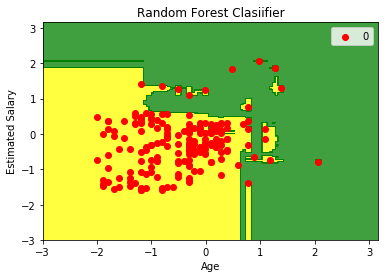

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


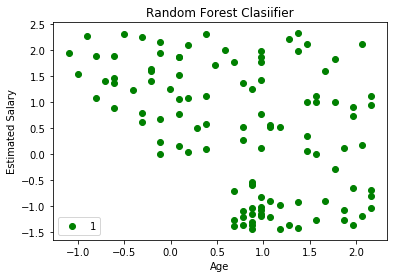

In [72]:
X_Set , Y_Set = X_Train , Y_Train
X1 ,X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1 , stop = X_Set[:, 0].max() + 1, step = 0.01) ,
                     np.arange(start = X_Set[:, 0].min() - 1 , stop = X_Set[:, 0].max() + 1, step = 0.01))

plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('yellow','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),x2.max())

for i,j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j , 1],
               c = ListedColormap(('red','green'))(i), label = j)
    
    plt.title('Random Forest Clasiifier')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()